In [2]:

dataset = pd.read_csv('data.csv')
df=dataset.copy()
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [4]:


df.shape



(6819, 96)

In [5]:
df.rename(columns = {"Bankrupt?" : "Bankrupt"}, inplace = True)

In [6]:
df["Bankrupt"] = df["Bankrupt"].astype(bool)

In [ ]:
import seaborn as sns
import matplotlib. pyplot as plt
pit. figure 50))
sns . heatmap(df. corr() . iloc[ : , , annot=True)

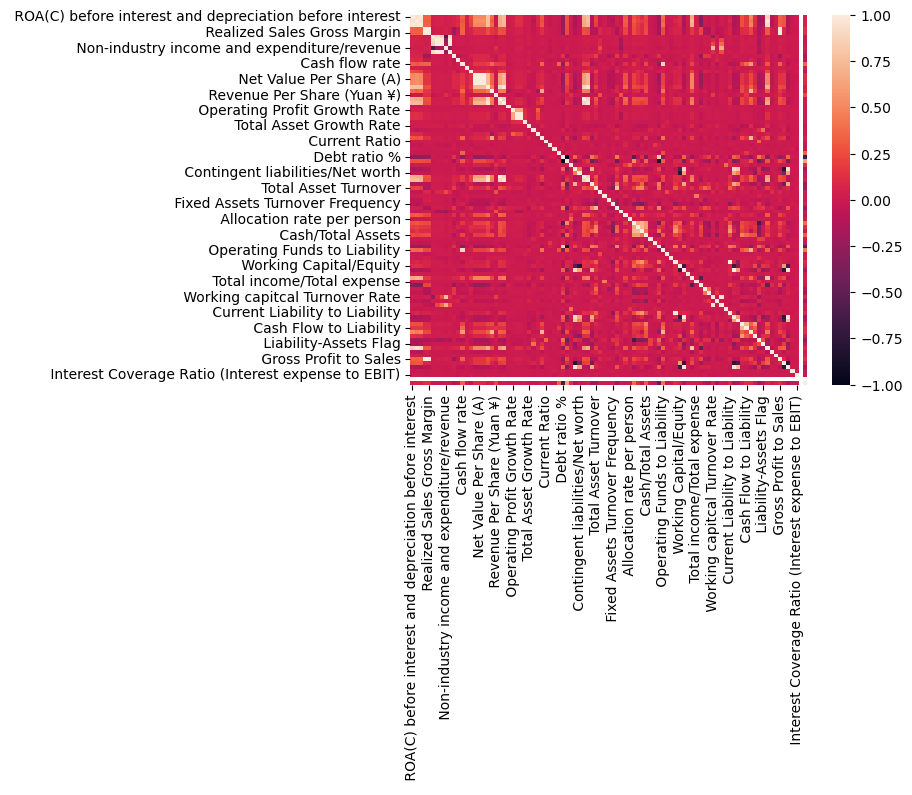

In [9]:
corr = df.drop(columns="Bankrupt").corr()
sns.heatmap(corr);

#it can be seen that there are a lot multicollinearity issues, skewed features, and the data is inbalanced.  all that in mind for this model it is better not to use regression (logistic regression). it is better to use decision tree model.

SPLIT

In [10]:
target = "Bankrupt"
X = df.drop(columns=target)
y = df[target]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5455, 95)
y_train shape: (5455,)
X_test shape: (1364, 95)
y_test shape: (1364,)


In [12]:
y_train.value_counts(normalize = True)

False    0.969019
True     0.030981
Name: Bankrupt, dtype: float64

In [15]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)
print(X_train_under.shape)

(338, 95)


In [16]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)

(10572, 95)


In [17]:


acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))
#it is very high because the data is imbalanced



Baseline Accuracy: 0.969


In [18]:
model_reg = DecisionTreeClassifier(random_state=42)

model_reg.fit(X_train, y_train)

model_under = DecisionTreeClassifier(random_state=42)

model_under.fit(X_train_under, y_train_under)

model_over =  DecisionTreeClassifier(random_state=42)

model_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=42)

In [19]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train,y_train)
    acc_test = m.score(X_test,y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))
    #what we see above is that none of them beat the baseline but over sampling score is much better.

Training Accuracy: 1.0
Test Accuracy: 0.9531
Training Accuracy: 0.813
Test Accuracy: 0.8057
Training Accuracy: 1.0
Test Accuracy: 0.9604


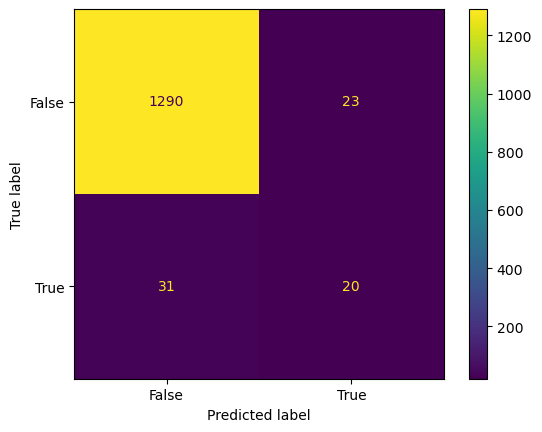

In [20]:
ConfusionMatrixDisplay.from_estimator(model_over, X_test,y_test);

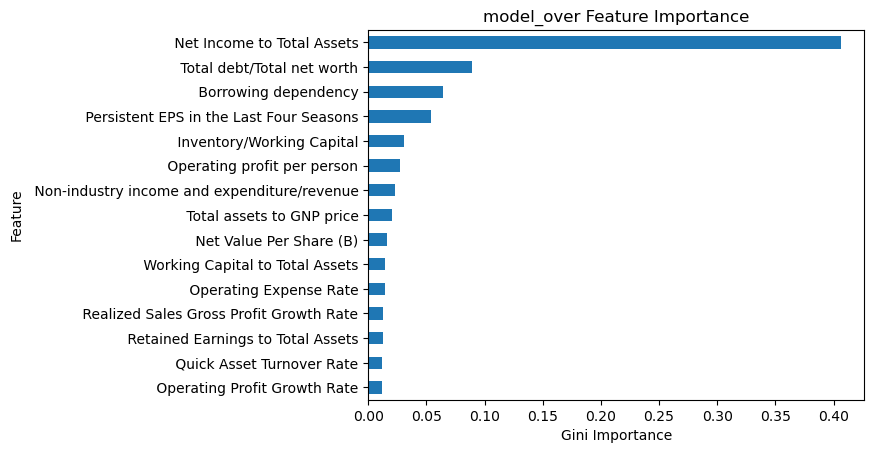

In [22]:
importances = model_over.feature_importances_

feat_imp = pd.Series(importances, index=X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

## Bagging Classifier

In [27]:
svm = SVC(probability=True)

In [31]:
X_train.shape

(5455, 95)

In [32]:
bag = BaggingClassifier(base_estimator= svm,
                 n_estimators = 10,
                 max_samples = 0.4,
                 max_features = 95,
                 bootstrap = True,
                 bootstrap_features = True,
                 n_jobs = -1,
                 random_state = 123)

In [35]:
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)
accuracy_score(y_test, bag_pred)*100

96.26099706744868

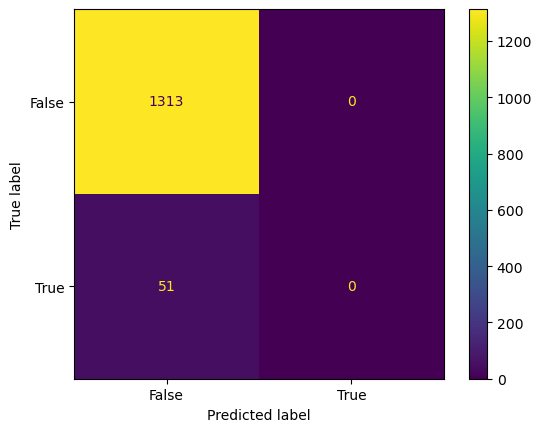

In [36]:
ConfusionMatrixDisplay.from_estimator(bag, X_test,y_test);

## Gradient Boosting Classifier


In [39]:
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
pred_gbc = gbk.predict(X_test)
acc_gbc = accuracy_score(y_test , pred_gbc)*100
acc_gbc

96.7741935483871

## XGBoost Classifier

In [40]:
xgbt = XGBClassifier(max_depth = 2,
             learning_rate = 0.2,
             objective  = "multi:softmax",
             num_class = 2,
             booster = "gbtree",
             n_estimarors = 10,
             random_state = 123)

In [42]:
xgbt.fit(X_train, y_train)
xgbt_pred = xgbt.predict(X_test)
accuracy_score(y_test, xgbt_pred)*100


[12:21:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimarors" } are not used.



96.5542521994135

In [43]:
xgbt.score(X_train, y_train)*100


98.91842346471127

In [44]:
xgbt.score(X_test, y_test)*100

96.5542521994135